# Setup

In [ ]:
import os
from google.colab import userdata, drive

os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
drive.mount('/content/drive')

# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp datasets
!pip install -q -U keras

os.environ["KERAS_BACKEND"] = "tensorflow"  # "jax" Or "torch" or "tensorflow".
# Avoid memory fragmentation on JAX backend.
#os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

# Training Configurations
lora_name = "translator"
lora_rank = 8
lr_value = 1e-4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tokenizer Test

In [ ]:
import keras_nlp

tokenizer = keras_nlp.models.GemmaTokenizer.from_preset("gemma_instruct_2b_en")

def detoken(tokens):
    print(tokens)
    for x in tokens.numpy():
        word = tokenizer.detokenize([x])
        print(f"{x} -> {word.numpy().decode('utf-8')}")

detoken(tokenizer("The quick brown fox jumped."))
detoken(tokenizer("안녕하세요. 반갑습니다. 오늘은 날씨가 참 좋네요."))
detoken(tokenizer("おはようございます。今日はいい天気ですね。"))
detoken(tokenizer("“대범 ᄉᆞᄅᆞᆷ이 복ᄌᆡ지한의 나ᄆᆡ 오륜이 이스니 오륜 즁의 군뷔 읏믐이라. ᄉᆞᄅᆞᆷ되고 오륜을 바리면 ᄉᆞᄅᆞᆷ이 아니라 ᄒᆞᄂᆞ니, 이졔 너ᄂᆞᆫ 지혜와 식견이 범ᄉᆞᄅᆞᆷ두곤 더ᄒᆞ되 이ᄅᆞᆯ 모로니 엇지 ᄋᆡ답지 아니ᄒᆞ리요. 우리 셰ᄃᆡ로 국은을 입어 ᄌᆞᄌᆞ손손히 녹을 바드니 망극ᄒᆞᆫ 마음이 갈츙보국ᄒᆞ더니, 우리의게 밋쳐ᄂᆞᆫ 널노 말무야마 역명을 장ᄎᆞ 어ᄂᆡ 곳듸 밋츨 쥴 모로게 되니 엇지 ᄒᆞᆫ심타 ᄲᅮᆫ이며, 난신과 젹ᄌᆞ 어ᄂᆡ ᄃᆡ의 업스리요마난 우리 문호의셔 날 쥴은 진실노 ᄯᅳᆺᄒᆞ지 못ᄒᆞ엿도다. 네의 죄목을 젼하 진로ᄒᆞ시니 맛당이 극형을 ᄒᆡᆼᄒᆞ실 거시로듸, ᄀᆞ지록 성은이 망극ᄒᆞᄉᆞ 죄를 더ᄒᆞ지 아니ᄒᆞ시고 날을 명ᄒᆞᄉᆞ 너을 ᄌᆞ부라 ᄒᆞ옵시니 망극ᄒᆞᆫ 마음 도로혀 황공ᄒᆞ며, 팔십 노친이 ᄇᆡᆨ슈 모년의 널노 ᄒᆞ야곰 쥬야 우려ᄒᆞ시던 즁의 네 이럿탓 변괴을 지어 죄을 나ᄅᆞ의 어드니 놀ᄂᆡ신 마음이 병이 되여 이졔 눕고 장ᄎᆞ 이지 못ᄒᆞ게 되시니, 부친 만일 널노 인ᄒᆞ야 셰상을 ᄇᆞ리시면 네 ᄉᆞᄅᆞ셔도 녁명을 입고, 쥭어 지ᄒᆞ의 간들 쳔츄만ᄃᆡ예 블츙블효지죄ᄅᆞᆯ 유전ᄒᆞᆯ지라. ᄯᅩᄒᆞᆫ 그 나문 우리 일문이 원통치 아니ᄒᆞᆯ야. 네 엇지 넉넉ᄒᆞᆫ 소견으로 이ᄅᆞᆯ ᄉᆡᆼ각지 못ᄒᆞᄂᆞ냐, 네 이 죄명을 ᄀᆞ지고 셰상의 용납할진ᄃᆡ ᄉᆞᄅᆞᆷ읜 비록 안셔ᄒᆞᄂᆞ 소소ᄒᆞᆫ 쳔벌이 ᄉᆞ졍이 잇스랴. 이졔 맛당히 쳔명을 슌슈ᄒᆞ야 조졍 쳐분을 지달일 ᄲᅮᆫ이니 ᄯᅩ 엇지ᄒᆞ리요. 네 일즉 도라오긔을 ᄇᆞᄅᆡ노라.” ᄒᆞ엿더라."))

tf.Tensor([   651   4320   8426  25341  32292 235265], shape=(6,), dtype=int32)
651 -> The
4320 ->  quick
8426 ->  brown
25341 ->  fox
32292 ->  jumped
235265 -> .
tf.Tensor(
[238179 243415 204551 235265  78821 241772  21743 235265  44245 240703
 236648 128856 241215 236361 120816 106509 239156 237526 235265], shape=(19,), dtype=int32)
238179 -> 안
243415 -> 녕
204551 -> 하세요
235265 -> .
78821 ->  반
241772 -> 갑
21743 -> 습니다
235265 -> .
44245 ->  오
240703 -> 늘
236648 -> 은
128856 ->  날
241215 -> 씨
236361 -> 가
120816 ->  참
106509 ->  좋
239156 -> 네
237526 -> 요
235265 -> .
tf.Tensor([130715 235362  40574  10598 106577  14088 235362], shape=(7,), dtype=int32)
130715 -> おはようございます
235362 -> 。
40574 -> 今日は
10598 -> いい
106577 -> 天気
14088 -> ですね
235362 -> 。
tf.Tensor(
[235366 236800 240696 235248 249341 251340 250451 251340 252379 235832
 122447 249745    442    351    378 236183 236511 236137  38585 250866
    442    351    378  44245 246862 235832  11464 236354 236405  44245
 246862 235248    453 

# Load Dataset

In [ ]:
import keras_nlp
tokenizer = keras_nlp.models.GemmaTokenizer.from_preset("gemma_instruct_2b_en")

from datasets import load_dataset
ds = load_dataset(
    "bebechien/HongGildongJeon",
    split="train",
)
print(ds)
data = ds.with_format("np", columns=["original", "modern translation"], output_all_columns=False)
train = []
max_token_len = 0

for x in data:
  item = f"<start_of_turn>user\n{x['original']}<end_of_turn>\n<start_of_turn>model\n{x['modern translation']}"
  train.append(item)
  length = tokenizer(item).get_shape().as_list()[0]
  if length > max_token_len:
    max_token_len = length
    print(f"longest toekn {max_token_len} - {item}")

print(train[0])
print(train[1])
print(train[2])

print(max_token_len)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset({
    features: ['original', 'modern translation'],
    num_rows: 447
})
longest toekn 383 - <start_of_turn>user
됴션국셰둉ᄃᆡ왕즉위십오연의홍희문밧긔ᄒᆞᆫᄌᆡ상이잇스되셩은홍이요명은문이니위인이쳥염강직ᄒᆞ여덩망이거록ᄒᆞ니당셰의영웅이라일직용문의올나벼살이할림의쳐ᄒᆞ엿더니명망이됴졍의읏듬되ᄆᆡ젼하그덕망을승이녀긔ᄉᆞ벼살을도도와이조판셔로좌으졍을ᄒᆞ이시니승상이국은을감동ᄒᆞ야갈츙보국ᄒᆞ니ᄉᆞ방의일이업고도젹이업스ᄆᆡ시화연풍ᄒᆞ여나라이ᄐᆡ평ᄒᆞ더라<end_of_turn>
<start_of_turn>model
조선국 세종대왕 즉위 십오년에 홍회문 밖에 한 재상이 있으되, 성은 홍이요, 명은 문이니, 위인이 청렴강직하여 덕망이 거룩하니 당세의 영웅이라. 일찍 용문에 올라 벼슬이 한림에 처하였더니 명망이 조정의 으뜸 되매, 전하 그 덕망을 승히 여기사 벼슬을 돋우어 이조판서로 좌의정을 하게 하시니, 승상이 국은을 감동하여 갈충보국하니 사방에 일이 업고 도적이 없으매 시화연풍하여 나라가 태평하더라.
longest toekn 1173 - <start_of_turn>user
일일은승상난간의비겨잠ᄀᆞᆫ조의더니ᄒᆞᆫ풍이긜을인도ᄒᆞ여ᄒᆞᆫ고듸다다르니쳥산은암암ᄒᆞ고녹슈난양양ᄒᆞᆫ듸셰류쳔만ᄀᆞ지녹음이파ᄉᆞᄒᆞ고황금갓ᄐᆞᆫᄭᅬᄭᅩ리난춘흥을희롱ᄒᆞ여냥뉴간의왕ᄂᆡᄒᆞ며긔화요초만발ᄒᆞᆫᄃᆡ쳥학ᄇᆡᆨ학이며비취공작이춘광을ᄌᆞ랑ᄒᆞ거날승상이경물을귀경ᄒᆞ며졈졈드러가니만쟝졀벽은하날의다엇고구뷔구뷔벽계슈난골골이폭포되어오운이어러엿난ᄃᆡ길이ᄭᅳᆫ쳐갈바을모로더니문득쳥용이물결을혜치고머리을드러고함ᄒᆞ니산학이믄허지난듯ᄒᆞ더니그용이입을버리고긔운을토ᄒᆞ여승상의입으로드러뵈거날ᄭᆡ다르니평ᄉᆡᆼᄃᆡ몽이라ᄂᆡ염의혜아리되피련군ᄌᆞ을나희리라ᄒᆞ여즉시ᄂᆡ당의드러ᄀᆞ시비을믈이치고부인을익그러취침코져ᄒᆞ니부인이졍ᄉᆡᆨ왈승상은국지ᄌᆡ상이라쳬위존즁ᄒᆞ시거날ᄇᆡᆨ쥬의졍실의드러와노류장화갓치ᄒᆞ시니ᄌᆡ상의쳬면이어ᄃᆡ잇난잇ᄀᆞ승상이ᄉᆡᆼ각ᄒᆞ신직말ᄉᆞᆷ은당연ᄒᆞ

# Load Model

In [ ]:
import keras
import keras_nlp

import time

gemma = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")
gemma.summary()

tick_start = 0

def tick():
    global tick_start
    tick_start = time.time()

def tock():
    print(f"TOTAL TIME ELAPSED: {time.time() - tick_start:.2f}s")

def text_gen(prompt):
    tick()
    input = f"<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"
    output = gemma.generate(input, max_length=512)
    print("\nGemma output:")
    print(output)
    tock()

text_gen("ᄃᆡ작ᄒᆞ여그ᄭᅩᆺ치흣터지거ᄂᆞᆯ")
text_gen("금두겁이품의드러뵈니일졍ᄌᆡᄌᆞᄅᆞᆯ나흐리로다ᄒᆞ더니과연그ᄃᆞᆯ부터잉ᄐᆡᄒᆞ여십삭이차니")
text_gen("이ᄯᆡᄂᆞᆫᄉᆞ월초팔일이라이날밤의오ᄉᆡᆨ구룸이집을두루고향ᄂᆡ진동ᄒᆞ며션녀ᄒᆞᆫᄡᅣᆼ이촉을들고드러와김ᄉᆡᆼᄃᆞ려니르ᄃᆡ")
text_gen("ᄌᆡ히길너텬졍을어긔지말으소셔이아희ᄇᆡ필은낙양니샹셔집아ᄌᆡ니")


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,506,172,416 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,506,172,416 (9.34 GB)

 Trainable params: 2,506,172,416 (9.34 GB)

 Non-trainable params: 0 (0.00 B)


Gemma output:
<start_of_turn>user
ᄃᆡ작ᄒᆞ여그ᄭᅩᆺ치흣터지거ᄂᆞᆯ<end_of_turn>
<start_of_turn>model
Sure, here's a translation of the phrase you provided:

"I am a person who is always searching for something."

This phrase is often used to describe someone who is curious and always looking for new information or experiences.
TOTAL TIME ELAPSED: 20.53s

Gemma output:
<start_of_turn>user
금두겁이품의드러뵈니일졍ᄌᆡᄌᆞᄅᆞᆯ나흐리로다ᄒᆞ더니과연그ᄃᆞᆯ부터잉ᄐᆡᄒᆞ여십삭이차니<end_of_turn>
<start_of_turn>model
금두겁이 품의드러뵈니일졍ᄌᆡᄌᆞᄅᆞᆯ나흐리로다ᄒᆞ더니과연그ᄃ misericordia에 대한 이야기입니다.
TOTAL TIME ELAPSED: 0.43s

Gemma output:
<start_of_turn>user
이ᄯᆡᄂᆞᆫᄉᆞ월초팔일이라이날밤의오ᄉᆡᆨ구룸이집을두루고향ᄂᆡ진동ᄒᆞ며션녀ᄒᆞᆫᄡᅣᆼ이촉을들고드러와김ᄉᆡᆼᄃᆞ려니르ᄃᆡ<end_of_turn>
<start_of_turn>model
The lyrics describe a night filled with a mysterious atmosphere and a sense of longing. The speaker wanders through a dark and deserted room, listening to the sounds of the night. The sounds seem to be coming from the room itself, creating an eerie and unsettling atmosphere. The speaker's thoughts are filled with a sen

# LoRA Fine-tuning

In [ ]:
# Enable LoRA for the model and set the LoRA rank (4, 8 or 16).
gemma.backbone.enable_lora(rank=lora_rank)
gemma.summary()

# Limit the input sequence length to 128 (to control memory usage).
gemma.preprocessor.sequence_length = 2048
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=lr_value,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,508,900,352 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,508,900,352 (9.35 GB)

 Trainable params: 2,727,936 (10.41 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

## multi epoch training

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 79s 236ms/step - loss: 0.7139 - sparse_categorical_accuracy: 0.3134
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - loss: 0.5748 - sparse_categorical_accuracy: 0.3836
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - loss: 0.5362 - sparse_categorical_accuracy: 0.4158
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - loss: 0.5061 - sparse_categorical_accuracy: 0.4435
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - loss: 0.4818 - sparse_categorical_accuracy: 0.4607
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - loss: 0.4673 - sparse_categorical_accuracy: 0.4719
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - loss: 0.4537 - sparse_categorical_accuracy: 0.4825
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - loss: 0.4361 - sparse_categorical_accuracy: 0.4963
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.5178
Epoch 10/20
122/122 ━━━━━━━━

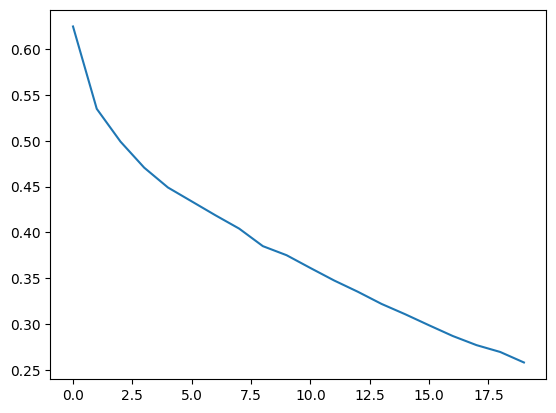

In [ ]:
history = gemma.fit(train, epochs=20, batch_size=1)
gemma.backbone.save_lora_weights(f"/content/drive/MyDrive/{lora_name}_{lora_rank}.lora.h5")
text_gen("나랏말ᄊᆞ미")
text_gen("나는월궁의션녀로셔")
text_gen("일쟝춘몽이라")
text_gen("션녀왈")

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

## Save LoRA for each epoch

In [ ]:
for x in range(20):
  gemma.fit(train, epochs=1, batch_size=1)
  model_name = f"/content/drive/MyDrive/{lora_name}_{lora_rank}_epoch{x+1}.lora.h5"
  gemma.backbone.save_lora_weights(model_name)
  text_gen("ᄃᆡ작ᄒᆞ여그ᄭᅩᆺ치흣터지거ᄂᆞᆯ")
  text_gen("금두겁이품의드러뵈니일졍ᄌᆡᄌᆞᄅᆞᆯ나흐리로다ᄒᆞ더니과연그ᄃᆞᆯ부터잉ᄐᆡᄒᆞ여십삭이차니")
  text_gen("이ᄯᆡᄂᆞᆫᄉᆞ월초팔일이라이날밤의오ᄉᆡᆨ구룸이집을두루고향ᄂᆡ진동ᄒᆞ며션녀ᄒᆞᆫᄡᅣᆼ이촉을들고드러와김ᄉᆡᆼᄃᆞ려니르ᄃᆡ")
  text_gen("ᄌᆡ히길너텬졍을어긔지말으소셔이아희ᄇᆡ필은낙양니샹셔집아ᄌᆡ니")

447/447 ━━━━━━━━━━━━━━━━━━━━ 158s 247ms/step - loss: 1.1020 - sparse_categorical_accuracy: 0.3199

Gemma output:
<start_of_turn>user
ᄃᆡ작ᄒᆞ여그ᄭᅩᆺ치흣터지거ᄂᆞᆯ<end_of_turn>
<start_of_turn>model
다작하여 그 밖에 지거늘을 잃어 떨어나라.
TOTAL TIME ELAPSED: 15.38s

Gemma output:
<start_of_turn>user
금두겁이품의드러뵈니일졍ᄌᆡᄌᆞᄅᆞᆯ나흐리로다ᄒᆞ더니과연그ᄃᆞᆯ부터잉ᄐᆡᄒᆞ여십삭이차니<end_of_turn>
<start_of_turn>model
금두겁이 품의 대러 보니 일정한 자사를 나오더니, 과연 그 대를부터 잉타하여십사이 차니
TOTAL TIME ELAPSED: 0.43s

Gemma output:
<start_of_turn>user
이ᄯᆡᄂᆞᆫᄉᆞ월초팔일이라이날밤의오ᄉᆡᆨ구룸이집을두루고향ᄂᆡ진동ᄒᆞ며션녀ᄒᆞᆫᄡᅣᆼ이촉을들고드러와김ᄉᆡᆼᄃᆞ려니르ᄃᆡ<end_of_turn>
<start_of_turn>model
이 침내한 사월 초팔일이 라이날밤에 오사기구룸이 집을 두루고 향내 진동하며 섬녀한 침을 들고 드러와 김사랑 대려니 르 reputa.
TOTAL TIME ELAPSED: 0.60s

Gemma output:
<start_of_turn>user
ᄌᆡ히길너텬졍을어긔지말으소셔이아희ᄇᆡ필은낙양니샹셔집아ᄌᆡ니<end_of_turn>
<start_of_turn>model
자히 길을 떠나 정을 어기 말하시어 이 아희 백필은 낙양니, 샹서 집어 자니
TOTAL TIME ELAPSED: 0.39s
447/447 ━━━━━━━━━━━━━━━━━━━━ 111s 247ms/step - loss: 0.7182 - sparse_categorical_accuracy: 0.4552

Gemma output:
<start_of_turn>user
ᄃᆡ작ᄒᆞ여그ᄭᅩᆺ치흣터지거ᄂᆞᆯ<end_of_turn>


# Inference after fine tuning

In [ ]:
text_gen("나랏말ᄊᆞ미")
text_gen("나는월궁의션녀로셔")
text_gen("일쟝춘몽이라")
text_gen("션녀왈")


Gemma output:
나랏말ᄊᆞ미 ᄒᆞᄉᆞ 율왕의 ᄒᆞᆫ ᄉᆞᄅᆞᆷ의 몸을 ᄉᆞᄅᆞᆷ 막고 왕실의 ᄒᆞᆫ임ᄀᆞ ᄒᆞᆫ지라. 율왕의 몸을 ᄉᆞᄅᆞᆷ이 잇셔 ᄒᆞᆫ ᄉᆞᄅᆞᆷ이 잇셔 ᄒᆞᆫ지라. ᄒᆞᆫ이라 ᄒᆞᆫ 율왕의 몸을 ᄉᆞᄅᆞᆷ의 ᄒᆞᆫ ᄉᆞᄅᆞᆷ이 잇셔 ᄒᆞᆫ지라. 율왕의 몸을 ᄉᆞᄅᆞᆷ이 잇셔 ᄒᆞᆫ지라. 율왕의 몸을 ᄅᆞᄅᆞᆷ이 잇셔 ᄒᆞᆫ지라. 율왕의 몸을 ᄉᆞᄅᆞᆷ이 잇셔 ᄒᆞᆫᄉᆡᆨ ᄯᆞ히ᄒᆞᆫ 몸이 ᄂᆡ난지라. 율왕의 몸을 ᄃᆡᄉᆞᆷ이 잇셔 ᄒᆞ
TOTAL TIME ELAPSED: 10.52s

Gemma output:
나는 월궁의 션녀로셔 ᄌᆞᆸ기 ᄌᆞᄌᆞᆷ의 길을 ᄉᆞᆷEtter이 ᄒᆞᆫ셔 ᄒᆞᆫ셔 ᄌᆞᄌᆞᆷ의 길을 ᄌᆞᄌᆞᆷ의 ᄌᆞᄇᆞ셔셔 ᄒᆞᆫ셔 ᄇᆡᆨ셩을 ᄉᆞᄅᆞᆷ의 길을 ᄌᆞᄇᆞ셔셔 ᄒᆞᆫ셔 ᄇᆡᆨ셩을 ᄉᆞᄅᆞᆷ으로 ᄒᆞᆫ셔 ᄇᆡᆨ셩의 ᄇᆡ을 ᄉᆞᄅᆞᆷ으로 ᄌᆞᄇᆞ셔셔 ᄇᆡᆨ셩의 길을 ᄒᆞᆫ셔 ᄇᆡ을 ᄯᅥᄒᆞᆫ셔 ᄇᆡᆨ셩의 ᄇᆡ을 ᄉᆞᄅᆞᆷ으로 ᄌᆞᄌᆞᆷ의 길을 ᄇᆞᄅᆞ셔셔 ᄇᆡᆨ셩의 길을 ᄇᆡ기 ᄌᆞᄇᆞ셔셔 ᄇᆡᆨ�
TOTAL TIME ELAPSED: 2.54s

Gemma output:
일쟝춘몽이라 ᄒᆞᆫ쳔 ᄌᆡ상이 ᄒᆞᆫ고 ᄉᆞᄅᆞᆷ의 ᄒᆞᆫ고 ᄒᆡᆼᄒᆞᆯ 잇셔 닷ᄀᆞᆺ치 ᄒᆞᆫ셔 ᄉᆞᄅᆞᆫ 군ᄉᆞ ᄀᆞᆺ치 ᄒᆞᆫ셔 ᄉᆞᄅᆞᆷ의 ᄌᆡ조 ᄒᆞᆫ군이 ᄒᆞᆫ고 ᄉᆞᄅᆞᆷ의 ᄒᆞᆫ고 ᄒᆞᆫᄉᆡᆼ ᄉᆞᄅᆞᆷ이 이르러 ᄀᆞᆺ쳐 ᄒᆞᆫ셔 ᄉᆞᄅᆞᆷ의 집히 ᄒᆞᆫ셔 ᄉᆞᄅᆞᆷ은 ᄒᆞᆫ셔 ᄀᆞᆡ의 ᄯᆞᄅᆞᆫ이 이러ᄒᆞᆫ ᄀᆞᆺ치 ᄒᆞᆫ듯이 ᄒᆞᆫ듯 ᄯᆡ ᄯᅬᄒᆞᆫ ᄉᆞᄅᆞᆷ이 ᄒᆞᆫ셔 ᄯᅩᄒᆞᆫ ᄉᆞᄅᆞᆷ이 이러ᄒᆞ
TOTAL TIME ELAPSED: 2.57s

Gemma output:
션녀왈 ᄉᆞᆷ졔 길의 ᄌᆞᆷ수을 ᄉᆞᆷ고, ᄃᆡ장부 ᄌᆞᆷ수을 ᄌᆞᆷ수으로 바꾸 ᄯᆞᆫ지 말고 ᄒᆞᆫ ᄉᆞᆷ수을 ᄌᆞᆷ수으로 바꾸 ᄯᆞᆫ지라. ᄃᆡ장부 ᄒᆞᆫ ᄉᆞᆷ수을 ᄉᆞᆷ수으로 바꾸 ᄯᆞᆫ지 말고 ᄇᆡᆨ셩을 ᄌᆞᆷ수을 ᄒᆞᆫ지 말고 ᄇᆡᆨ셩을 ᄒᆞᆫ

# Load pre-trained LoRA

In [ ]:
gemma.backbone.enable_lora(lora_rank)
gemma.backbone.load_lora_weights(f"/content/drive/MyDrive/{lora_name}_{lora_rank}.lora.h5")

In [ ]:
gemma.compile(sampler=keras_nlp.samplers.TopKSampler(k=3, temperature=0.7))